# **Sentiment Analys Aplikasi Bibit - Reksadana dan Obligasi**
## **M Wildan Nurohman**
## MC - 19

**IMPORT LIBRARY**

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00


In [83]:
from google_play_scraper import app, reviews, Sort, reviews_all # untuk mengakses ulasan dan informasi dari google play store
import pandas as pd  # untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # untuk menonaktifkan peringatan chaining
import numpy as np  # untuk komputasi numerik
seed = 0
np.random.seed(seed)  # mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # untuk visualisasi data
import seaborn as sns  # untuk visualisasi data statistik, mengatur gaya visualisasi
import datetime as dt  # untuk manipulasi data waktu dan tanggal
import re  # untuk bekerja dengan ekspresi reguler
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  # daftar kata-kata berhenti dalam teks
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # untuk mengubah teks menjadi vektor fitur
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # untuk menghapus stop word dalam bahasa Indonesia
from wordcloud import WordCloud  # visualisasi berbentuk word cloud dari teks
import pickle
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from google_play_scraper import app, reviews_all, Sort
import csv
!pip install requests
import requests
import json

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**SCRAPPING DATASET**

In [3]:
# mengambil review pengguna aplikasi bibit
scrapreview = reviews_all(
    'com.bibit.bibitid',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=130000
)

# membatasi scraping hanya 130.000 data ulasan
scrapreview_limited = scrapreview[:130000]

In [4]:
with open('scrapping_bibit.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Menulis header CSV
    writer.writerow(['content','score'])

    # Menulis tiap ulasan ke dalam file CSV
    for review in scrapreview_limited:
        writer.writerow([
            review['content'],
            review.get('score', '')
        ])

**LOAD DATASET**

In [5]:
reviews_df = pd.DataFrame(scrapreview_limited) # membuat dataframe hasil scrapview_limited
reviews_df.shape
reviews_df.head()
reviews_df.to_csv('scrapping_bibit.csv', index=False)

# menghitung jumlah baris dan kolom dalam dataframe
jumlah_kolom, jumlah_reviews = reviews_df.shape

# 5 baris pertama reviews_df
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,67af427b-48f1-46cf-92dc-8c796b047c67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa.. fitur pencairan instan tiba-tiba tida...,1,33,3.94.0,2025-04-02 12:09:29,"Hai kak, mohon maaf atas ketidaknyamanan yg di...",2025-04-03 13:04:25,3.94.0
1,c7f0495a-f8c2-4d81-80ca-b2ed2b20c68a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5 bintang lah buat aplikasinya semuanya aman d...,5,41,3.94.0,2025-04-17 09:38:50,None,NaT,3.94.0
2,c730c2a9-28a9-4c1d-a636-e94dd217e04a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tempat investasi paling mudah dipelajari. UI n...,4,0,3.94.0,2025-04-18 15:41:56,Terima kasih telah memilih Bibit sebagai platf...,2025-04-21 08:59:43,3.94.0
3,47b2cfa8-e6d5-4ced-9879-62815999daa8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kontrol investasi paling oke, menurutku. Secar...",4,0,3.94.0,2025-04-24 06:23:31,None,NaT,3.94.0
4,a4d66b3e-b3f7-474d-b2c6-2e25f7d3f793,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aku saya lupa pin, saat ingin rubah pin di sur...",1,16,3.94.0,2025-04-07 11:06:22,"Hai kak, mohon maaf atas ketidaknyamanan yang ...",2025-04-08 05:33:48,3.94.0


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39632 entries, 0 to 39631
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              39632 non-null  object        
 1   userName              39632 non-null  object        
 2   userImage             39632 non-null  object        
 3   content               39632 non-null  object        
 4   score                 39632 non-null  int64         
 5   thumbsUpCount         39632 non-null  int64         
 6   reviewCreatedVersion  34003 non-null  object        
 7   at                    39632 non-null  datetime64[ns]
 8   replyContent          6191 non-null   object        
 9   repliedAt             6191 non-null   datetime64[ns]
 10  appVersion            34003 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 3.3+ MB


In [7]:
# menghapus baris yg memiliki missing value dan disimpan ke dalam dataframe clean_df
clean_df = reviews_df.dropna()

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4637 entries, 0 to 37413
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4637 non-null   object        
 1   userName              4637 non-null   object        
 2   userImage             4637 non-null   object        
 3   content               4637 non-null   object        
 4   score                 4637 non-null   int64         
 5   thumbsUpCount         4637 non-null   int64         
 6   reviewCreatedVersion  4637 non-null   object        
 7   at                    4637 non-null   datetime64[ns]
 8   replyContent          4637 non-null   object        
 9   repliedAt             4637 non-null   datetime64[ns]
 10  appVersion            4637 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 434.7+ KB


In [8]:
# menghapus data duplikat dari clean_df
clean_df = clean_df.drop_duplicates()

# menghitung jumlah baris dan kolom clean_df setelah proses menghapus duplikat
jumlah_baris_clean_df, jumlah_kolom_clean_df = clean_df.shape

# mencetak jumlah baris dan kolom setelah proses menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {jumlah_baris_clean_df}")

Jumlah baris setelah menghapus duplikat: 4637


In [9]:
print(clean_df.isnull().sum())

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64


**Preprocessing**

In [47]:
def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # hapus mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
  text = re.sub(r"http\S+", '', text) # hapus link
  text = re.sub(r'[0-9]+', '', text) # hapus numbers
  text = re.sub(r'[^\w\s]', '', text) # hapus numbers
  text = text.replace('\n', ' ') # ganti newline dengan spasi
  text = text.translate(str.maketrans('', '', string.punctuation)) # hapus tanda baca
  text = text.strip(' ') # hapus spasi diawal dan diakhir teks
  return text

def casefoldingText(text):
  text = text.lower()
  return text

def tokeninizeText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  stop_words = set(stopwords.words('indonesian'))
  stop_woord2 = set(stopwords.words('english'))
  stop_words.update(stop_woord2)
  stop_words.update(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                      'kalo', 'amp', 'biar', 'bikin', 'bilang',
                      'gak', 'ga', 'sih', 'deh', 'loh', 'kah', 'gjls' 'ms', 'nya'])
  filtered_text = []
  for txt in text :
    if txt not in stop_words: # memeriksa apakah kata bukan stopword
      filtered_text.append(txt) # menambahkan kata yg bukan stopword ke filtered_text
  text = filtered_text
  return text

def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer() # membuat stemmer
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  text = ' '.join(stemmed_words) # menggabungkan kata yg telah di stemm menjadi 1 kalimat
  stemmed_text = []
  for txt in text:
    stemmed_text.append(stemmer.stem(txt))
  return stemmed_text

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)  # menggabungkan daftar kata menjadi satu kalimat
  return sentence

def fix_slangwords(text):
    words = text.split()  # membagi teks menjadi kata - kata
    fixed_words = []
    for word in words:
        if word.lower() in slang_words:  # memeriksa apakah kata tersebut adalah slang
            fixed_words.append(slang_words[word.lower()])  # mengganti slang menjadi standar
        else:
            fixed_words.append(word.lower())
    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,67af427b-48f1-46cf-92dc-8c796b047c67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa.. fitur pencairan instan tiba-tiba tida...,1,33,3.94.0,2025-04-02 12:09:29,"Hai kak, mohon maaf atas ketidaknyamanan yg di...",2025-04-03 13:04:25,3.94.0
2,c730c2a9-28a9-4c1d-a636-e94dd217e04a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tempat investasi paling mudah dipelajari. UI n...,4,0,3.94.0,2025-04-18 15:41:56,Terima kasih telah memilih Bibit sebagai platf...,2025-04-21 08:59:43,3.94.0
4,a4d66b3e-b3f7-474d-b2c6-2e25f7d3f793,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aku saya lupa pin, saat ingin rubah pin di sur...",1,16,3.94.0,2025-04-07 11:06:22,"Hai kak, mohon maaf atas ketidaknyamanan yang ...",2025-04-08 05:33:48,3.94.0
5,449ca22c-00ed-43a1-a1b4-0fc483d0c693,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Fitur pencairan instannya patut dipertanyakan....,1,2,3.94.0,2025-04-23 11:19:11,"Hai kak, untuk melakukan pencairan instant pas...",2025-04-24 01:07:26,3.94.0
6,1e4c652a-c7d6-44a4-be8a-2823168f890b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa gk bisa login, pesan yg muncul bila...",1,18,3.93.0,2025-03-08 11:32:12,"Hai kak, kemungkinan jaringan internet kakak t...",2025-03-09 05:15:36,3.93.0
...,...,...,...,...,...,...,...,...,...,...,...
37393,6b7f7a23-e7fe-4936-b727-6c581281f2fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,top,4,0,1.2.2,2019-03-14 00:28:57,"Hai Ikhsan,\nTerima kasih telah berinvestasi r...",2019-03-14 01:55:06,1.2.2
37394,bd3dd706-b6c6-4cea-a0fc-b77421e0463f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,lumayan,4,0,1.2.2,2019-02-19 01:13:47,Terima kasih telah berinvestasi reksadana mela...,2019-02-21 02:01:46,1.2.2
37395,6361e5bb-0d3c-4305-8206-b6d2d5af729c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,4,0,1.2.2,2019-02-20 12:15:32,Terima kasih telah berinvestasi reksadana mela...,2019-02-21 02:03:39,1.2.2
37396,a78b9c1d-d9e1-4b88-a029-17426593df11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,I like it,4,0,1.2.2,2019-02-20 03:25:14,Terima kasih telah berinvestasi reksadana mela...,2019-02-21 01:59:41,1.2.2


In [12]:
url = 'https://raw.githubusercontent.com/wildannrr/bibitApp_sentiment-analiss/refs/heads/main/slang_words.json'

response = requests.get(url)

if response.status_code == 200:
    slang_words = response.json()
else:
    print("Gagal mengambil data dari URL")

In [20]:
clean_df['clean_text'] = clean_df['content'].apply(cleaningText) # membersihkan teks pada kolom 'Content' menggunakan fungsi cleaningText dan menyimpan hasilnya dalam kolom baru 'text_clean'
clean_df['casefolding_text'] = clean_df['text_clean'].apply(casefoldingText) # melakukan case folding pada teks yang sudah dibersihkan dan menyimpan hasilnya dalam kolom 'text_casefoldingText'
clean_df['slangwords_text'] = clean_df['text_casefoldingText'].apply(fix_slangwords) # Memperbaiki kata-kata slang dalam teks yang sudah di-casefold dan menyimpan hasilnya dalam kolom 'text_slangwords'
clean_df['tokenizing_text'] = clean_df['text_slangwords'].apply(tokeninizeText) # Melakukan tokenisasi pada teks yang sudah diperbaiki slangwords dan menyimpan hasilnya dalam kolom 'text_tokenizingText'
clean_df['stopword_text'] = clean_df['text_tokenizingText'].apply(filteringText) # Melakukan filtering stopwords pada teks yang sudah di-tokenisasi dan menyimpan hasilnya dalam kolom 'text_stopword'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence) # Menggabungkan kata-kata yang sudah difilter stopwords menjadi satu kalimat dan menyimpan hasilnya dalam kolom 'text_akhir'

clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,casefolding_text,slangwords_text,tokenizing_text,stopword_text
0,67af427b-48f1-46cf-92dc-8c796b047c67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa.. fitur pencairan instan tiba-tiba tida...,1,33,3.94.0,2025-04-02 12:09:29,"Hai kak, mohon maaf atas ketidaknyamanan yg di...",2025-04-03 13:04:25,...,kecewa fitur pencairan instan tibatiba tidak b...,kecewa fitur pencairan instan tibatiba tidak b...,kecewa fitur pencairan instan tibatiba tidak b...,"[kecewa, fitur, pencairan, instan, tibatiba, t...","[kecewa, fitur, pencairan, instan, tibatiba, p...",kecewa fitur pencairan instan tibatiba percaya...,kecewa fitur pencairan instan tibatiba tidak b...,kecewa fitur pencairan instan tibatiba tidak b...,"[kecewa, fitur, pencairan, instan, tibatiba, t...","[kecewa, fitur, pencairan, instan, tibatiba, p..."
2,c730c2a9-28a9-4c1d-a636-e94dd217e04a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tempat investasi paling mudah dipelajari. UI n...,4,0,3.94.0,2025-04-18 15:41:56,Terima kasih telah memilih Bibit sebagai platf...,2025-04-21 08:59:43,...,tempat investasi paling mudah dipelajari UI ny...,tempat investasi paling mudah dipelajari ui ny...,tempat investasi paling mudah dipelajari ui ny...,"[tempat, investasi, paling, mudah, dipelajari,...","[investasi, mudah, dipelajari, ui, nyaman, sis...",investasi mudah dipelajari ui nyaman sistem mu...,tempat investasi paling mudah dipelajari ui ny...,tempat investasi paling mudah dipelajari ui ny...,"[tempat, investasi, paling, mudah, dipelajari,...","[investasi, mudah, dipelajari, ui, nyaman, sis..."
4,a4d66b3e-b3f7-474d-b2c6-2e25f7d3f793,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aku saya lupa pin, saat ingin rubah pin di sur...",1,16,3.94.0,2025-04-07 11:06:22,"Hai kak, mohon maaf atas ketidaknyamanan yang ...",2025-04-08 05:33:48,...,aku saya lupa pin saat ingin rubah pin di suru...,aku saya lupa pin saat ingin rubah pin di suru...,aku saya lupa pin saat ingin rubah pin di suru...,"[aku, saya, lupa, pin, saat, ingin, rubah, pin...","[lupa, pin, rubah, pin, suruh, masukan, ktp, k...",lupa pin rubah pin suruh masukan ktp kali coba...,aku saya lupa pin saat ingin rubah pin di suru...,aku saya lupa pin saat ingin rubah pin di suru...,"[aku, saya, lupa, pin, saat, ingin, rubah, pin...","[lupa, pin, rubah, pin, suruh, masukan, ktp, k..."
5,449ca22c-00ed-43a1-a1b4-0fc483d0c693,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Fitur pencairan instannya patut dipertanyakan....,1,2,3.94.0,2025-04-23 11:19:11,"Hai kak, untuk melakukan pencairan instant pas...",2025-04-24 01:07:26,...,Fitur pencairan instannya patut dipertanyakan ...,fitur pencairan instannya patut dipertanyakan ...,fitur pencairan instannya patut dipertanyakan ...,"[fitur, pencairan, instannya, patut, dipertany...","[fitur, pencairan, instannya, patut, pencairan...",fitur pencairan instannya patut pencairan rdn ...,fitur pencairan instannya patut dipertanyakan ...,fitur pencairan instannya patut dipertanyakan ...,"[fitur, pencairan, instannya, patut, dipertany...","[fitur, pencairan, instannya, patut, pencairan..."
6,1e4c652a-c7d6-44a4-be8a-2823168f890b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa gk bisa login, pesan yg muncul bila...",1,18,3.93.0,2025-03-08 11:32:12,"Hai kak, kemungkinan jaringan internet kakak t...",2025-03-09 05:15:36,...,Ini kenapa gk bisa login pesan yg muncul bilan...,ini kenapa gk bisa login pesan yg muncul bilan...,ini kenapa tidak bisa login pesan yang muncul ...,"[ini, kenapa, tidak, bisa, login, pesan, yang,...","[login, pesan, muncul, sinyal, nya, jelek, sin...",login pesan muncul sinyal nya jelek sinyal ku ...,ini kenapa gk bisa login pesan yg muncul bilan...,ini kenapa tidak bisa login pesan y

In [21]:
def load_lexicon(url):
    lexicon = dict()
    response = requests.get(url)

    if response.status_code == 200:  # jika status response adalah 200 artinya oke
        lines = response.text.strip().split('\n')  # memisahkan menjadi baris baris
        for line in lines:
            parts = line.split(',')  # memisahkan baris menjadi bagian-bagian berdasarkan koma
            word = ','.join(parts[:-1])  # menggabungkan bagian-bagian kecuali bagian terakhir
            score = parts[-1]  # mengambil bagian terakhir sebagai skor
            lexicon[word.strip()] = int(score.strip())
    else:
        print(f"Gagal mengambil lexicon dari :  {url}")

    return lexicon

url_leksikon_positif = 'https://raw.githubusercontent.com/wildannrr/bibitApp_sentiment-analiss/refs/heads/main/positive_weighted.csv'
url_leksikon_negatif = 'https://raw.githubusercontent.com/wildannrr/bibitApp_sentiment-analiss/refs/heads/main/negative_weighted.csv'

positive = load_lexicon(url_leksikon_positif)
negative = load_lexicon(url_leksikon_negatif)

In [39]:
def sentiment_analysis_indonesia(text):
    score = 0  # Inisialisasi skor sentimen

    for word in text:
        if (word in positive):  # jika kata ada dalam leksikon positif
            score = score + positive[word]  # tambahkan skor positif kata tersebut ke skor total

    for word in text:
        if (word in negative):  # jika kata ada dalam leksikon negatif
            score = score + negative[word]  # tambahkan skor negatif kata tersebut ke skor total

    polarity = ''  # inisialisasi polaritas sentimen

    if (score > 0):
        polarity = 'positive'  # jika skor positif, polaritas positif
    elif (score < 0):
        polarity = 'negative'  # jika skor negatif,  polaritas negatif
    else:
        polarity = 'neutral'  # jika skor nol, polaritas netral

    return score, polarity  # mengembalikan skor sentimen dan polaritasnya

In [40]:
results = clean_df['text_stopword'].apply(sentiment_analysis_indonesia)
# Menggunakan fungsi sentiment_analysis_lexicon_indonesia untuk menghitung skor sentimen dan polaritas untuk setiap teks dalam kolom 'text_stopword'
# Hasilnya disimpan dalam variabel results sebagai objek Series yang berisi tuple (skor, polaritas)

results = list(zip(*results)) # Membongkar tuple hasil menjadi dua list terpisah: satu untuk skor sentimen dan satu lagi untuk polaritas

clean_df['polarity_score'] = results[0] # Menyimpan skor sentimen dari hasil analisis ke dalam kolom baru 'polarity_score' pada DataFrame clean_df

clean_df['polarity'] = results[1] # Menyimpan polaritas sentimen dari hasil analisis ke dalam kolom baru 'polarity' pada DataFrame clean_df

print(clean_df['polarity'].value_counts()) # Mencetak jumlah kemunculan setiap kategori polaritas sentimen ('positive', 'negative', 'neutral') dari kolom 'polarity' dalam DataFrame clean_df

# clean_df.to_csv('labeled_text.csv', encoding='utf8', index=False)
#unduh dataset yang sudah diberi label

polarity
neutral     2315
positive    1368
negative     954
Name: count, dtype: int64


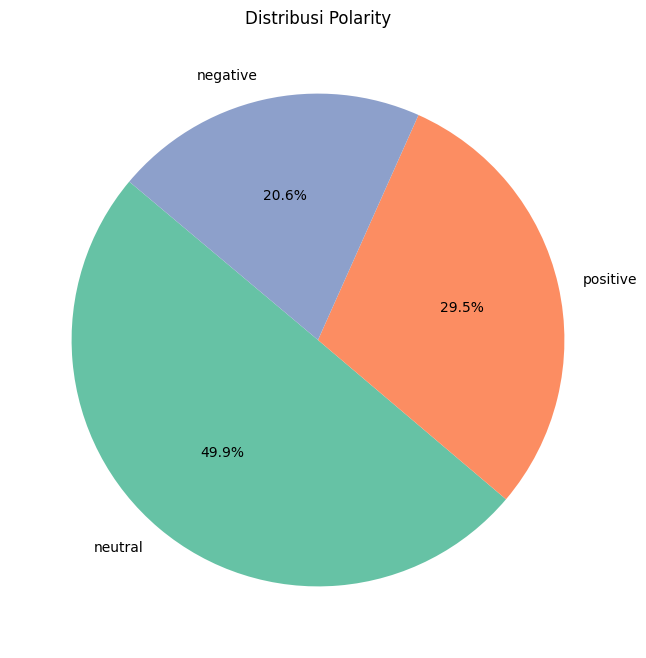

In [41]:
# Hitung jumlah masing-masing kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribusi Polarity')
plt.show()

**EXPLORASI LABEL**

In [66]:
# membuat wordcloud untuk semua data
all_words = ' '.join([text for text in clean_df['text_akhir']])
all_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# wordcloud untuk data positif
positive_words = ' '.join([text for text in clean_df['text_akhir'][clean_df['polarity'] == 'positive']])
positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

# wordcloud untuk data negatif
negative_words = ' '.join([text for text in clean_df['text_akhir'][clean_df['polarity'] == 'negative']])
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

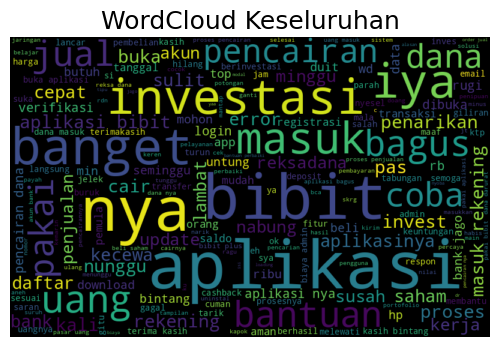

In [63]:
# wordCloud general
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Keseluruhan', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

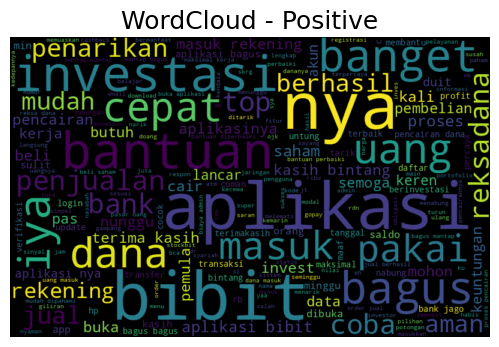

In [64]:
# menampilkan WordCloud Positive
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 2)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('WordCloud - Positive', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

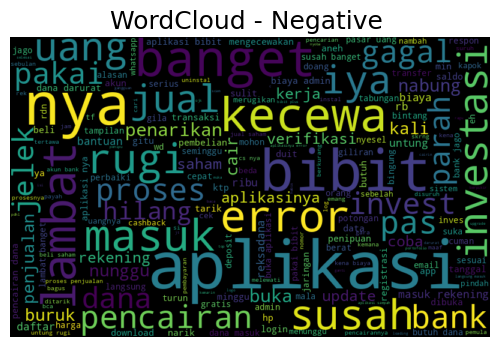

In [65]:
# Menampilkan WordCloud Negative
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('WordCloud - Negative ', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

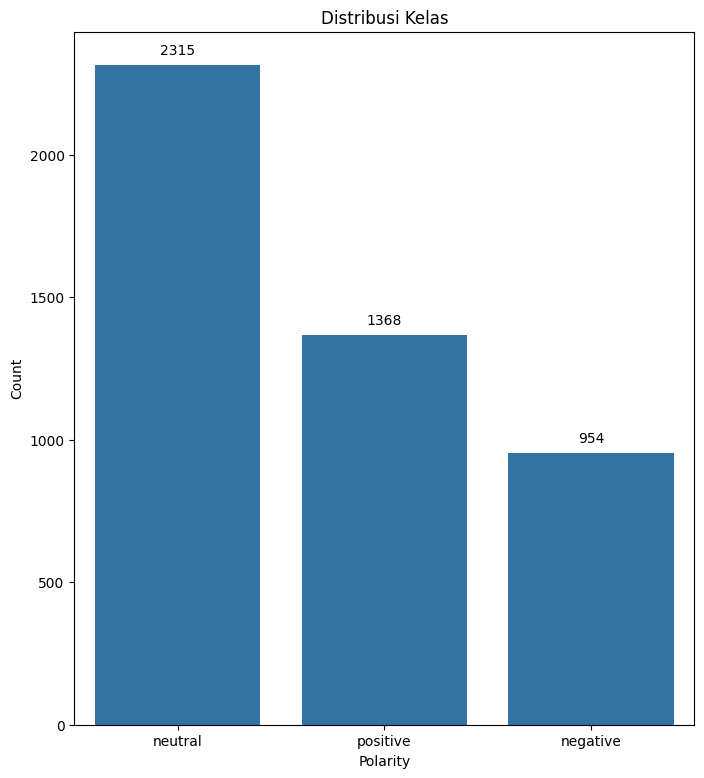

In [99]:
plt.figure(figsize=(8, 9))

# membuat plot count menggunakan seaborn untuk variabel 'polarity' dari dataframe 'clean_df'
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')
plt.xlabel('Polarity')
plt.ylabel('Count')

# menambahkan label angka untuk setiap bar pada plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

plt.show()

**DATA SPLITTING & EKSTRAKSI FITUR DENGAN TF-IDF**

In [79]:
X = clean_df['text_akhir'] # Menyimpan nilai pada dataframe text_akhir ke variabel X
y = clean_df['polarity'] # Menyimpan nilai pada dataframe polarity ke variabel y

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8, ngram_range=(1, 1))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,admin,akun,aman,aneh,aplikasi,aplikasinya,app,bagus,banget,bank,...,uangnya,ulang,uninstal,uninstall,untung,update,upgrade,verifikasi,wd,ya
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.171915,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.209854,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.148978,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311028,0.0
4,0.000000,0.0,0.0,0.0,0.164338,0.0,0.0,0.249178,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4633,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4634,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4635,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


**MODELING**

In [80]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [81]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.97442218798151
Random Forest - accuracy_test: 0.8793103448275862


In [74]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8791987673343605
Logistic Regression - accuracy_test: 0.8613505747126436


In [75]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.97442218798151
Decision Tree - accuracy_test: 0.8354885057471264


In [76]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8375963020030817
Naive Bayes - accuracy_test: 0.8175287356321839


In [84]:
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)
print()
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)
print()
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)
print()
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Naive Bayes - accuracy_train: 0.8375963020030817
Naive Bayes - accuracy_test: 0.8175287356321839

Random Forest - accuracy_train: 0.97442218798151
Random Forest - accuracy_test: 0.8793103448275862

Logistic Regression - accuracy_train: 0.8791987673343605
Logistic Regression - accuracy_test: 0.8613505747126436

Decision Tree - accuracy_train: 0.97442218798151
Decision Tree - accuracy_test: 0.8354885057471264


In [86]:
# simpan model random forest
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

# simpan tfid
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [87]:
def preprocess_text(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    text = tokeninizeText(text)
    text = filteringText(text)
    text = toSentence(text)
    return text

def prediksi_sentimen_kalimat_baru(review_baru, tfidf, svm):
    # melakukan preprocessing pada kalimat baru
    review_baru_cleaned = cleaningText(review_baru)
    review_baru_casefolded = casefoldingText(review_baru_cleaned)
    review_baru_slangfixed = fix_slangwords(review_baru_casefolded)
    review_baru_tokenized = tokeninizeText(review_baru_slangfixed)
    review_baru_filtered = filteringText(review_baru_tokenized)
    review_baru_final = toSentence(review_baru_filtered)

    # menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
    X_review_baru = tfidf.transform([review_baru_final])

    # convert sparse matrix to dense array
    X_review_baru = X_review_baru.toarray()

    # memperoleh prediksi sentimen review baru menggunakan model terbaik
    prediksi_sentimen = svm.predict(X_review_baru)

    # menampilkan hasil prediksi
    if prediksi_sentimen[0] == 'positive':
        hasil = "Sentimen review adalah POSITIF."
    elif prediksi_sentimen[0] == 'negative':
        hasil = "Sentimen review adalah NEGATIF."
    else:
        hasil = "Sentimen review adalah NETRAL."

    return hasil

In [101]:
review_baru = "aplikasi jelek, gagal login mulu"
prediksi_sentimen_kalimat_baru(review_baru, tfidf,random_forest )

'Sentimen review baru adalah NEGATIF.'

In [90]:
review_baru = "keren banget, fitur lancar, investasi mudah"
prediksi_sentimen_kalimat_baru(review_baru, tfidf,random_forest )

'Sentimen review baru adalah POSITIF.'

In [93]:
review_baru = "lumayan lah ya"
prediksi_sentimen_kalimat_baru(review_baru, tfidf, random_forest)

'Sentimen review baru adalah NETRAL.'

In [1]:
!pip freeze > requirement.txt